In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, GridSearchCV
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/Users/hyungtaegoh/Desktop/STUDY/Data_Preprocessing/Update/Regression/kc_house_data.csv'
data = pd.read_csv(path) #, index_col = 'id')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(f'Number of Observation : {data.shape[0]} \nNumber of Varibales : {data.shape[1]}')

Number of Observation : 21613 
Number of Varibales : 21


In [4]:
# Null Value check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Null, NaN, NA values check
# No NA values
Naninfo = data.isnull().sum()
Naninfo = Naninfo.sort_values(ascending = False)
Naninfo = Naninfo[Naninfo > 0]
Naninfo

Series([], dtype: int64)

In [6]:
# Unique names for features with Nan values
# for col in Naninfo.index:
#     print(f'{col} : {data[col].unique().tolist()[:10]}') # Max 10 

# Target : delete the observation
# Numerical : replaced mean, max, min and so on
# Categorical : replaced new category'NaN'

# Example: 
# for feature in ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
#                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
#                 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
#                'Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
#                'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']:
#     X_train[feature] = X_train[feature].fillna(X_train[feature].mean())
#     X_test[feature] = X_test[feature].fillna(X_test[feature].mean())

# for feature in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType',
#                'GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond',
#                'BsmtFinType1','Electrical','MSZoning','Functional','Utilities','KitchenQual',
#                'SaleType','Exterior1st','Exterior2nd','MasVnrType']:
#     X_train[feature] = X_train[feature].fillna('NaN')
#     X_test[feature] = X_test[feature].fillna('NaN')
    

In [7]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
# Simple statistics for int variables
# 수치형 변수들 간단한 통계량 제공

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
data = sm.add_constant(data) # beta0 value added (1.0 added)

data.columns

Index(['const', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

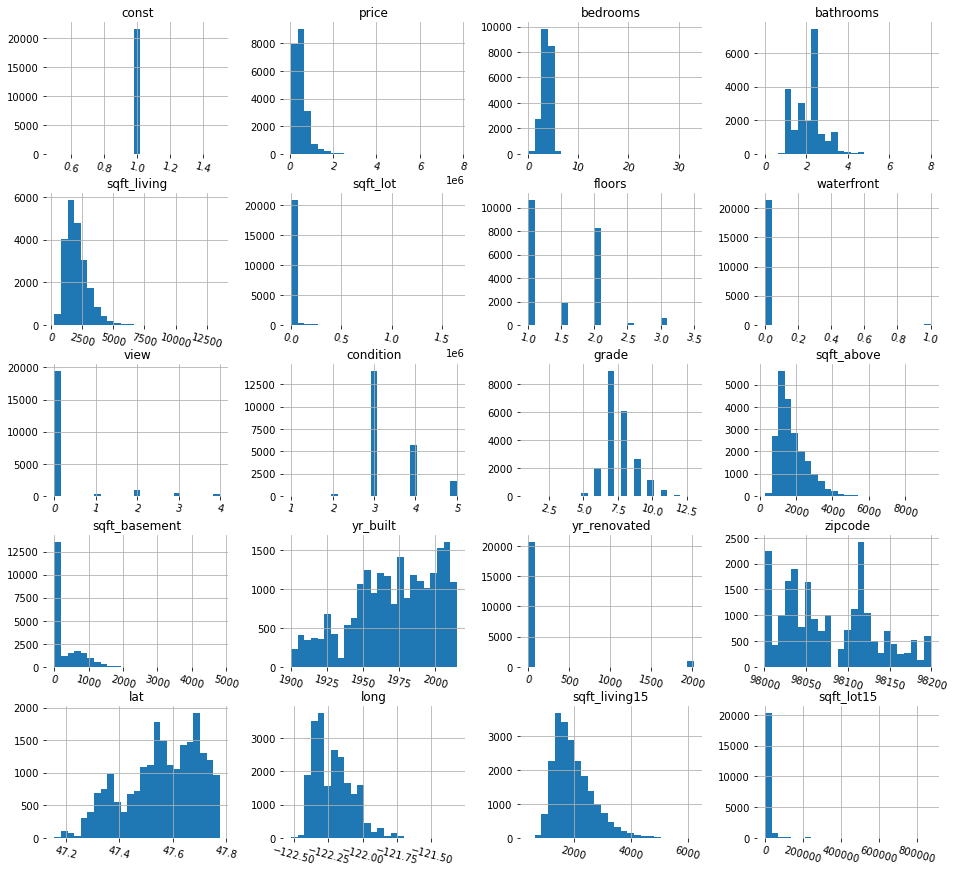

In [10]:
df1=data.drop(['id', 'date'], axis = 1)

h = df1.hist(bins=25,figsize=(16,15),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

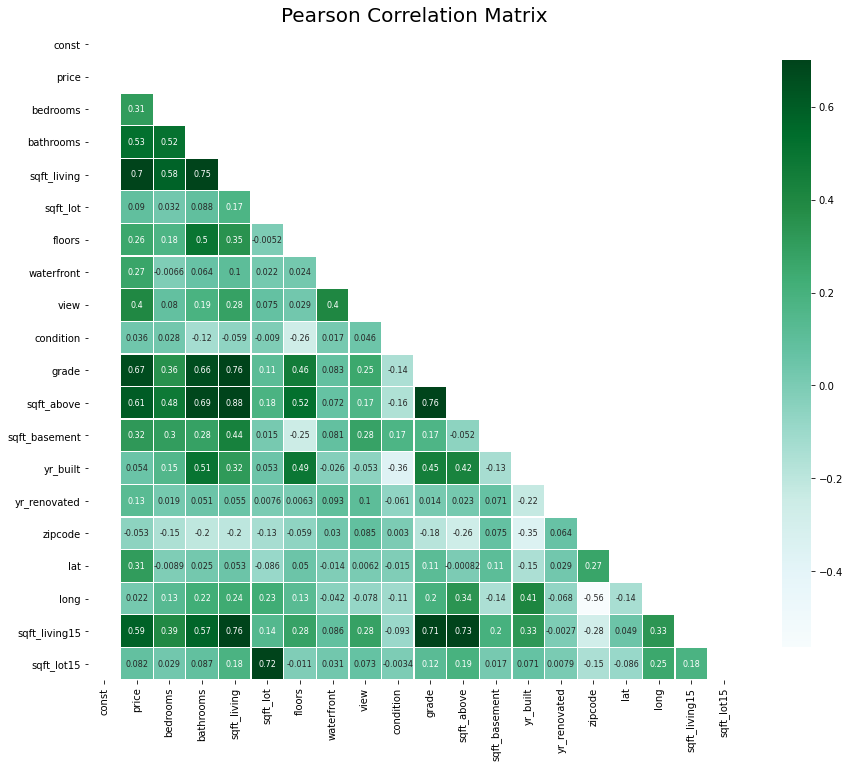

In [11]:
# high correlation -> possible overfitting
# ex) remove one of bathrooms and sqt_living

mask = np.zeros_like(df1.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation Matrix',fontsize=20)

sns.heatmap(df1.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

### Simple Linear Regression

,rmse,mse,r2
Simple LR Train,262756.654381,175236.850677,0.490826
Simple LR Test,258345.346455,170197.175273,0.497614


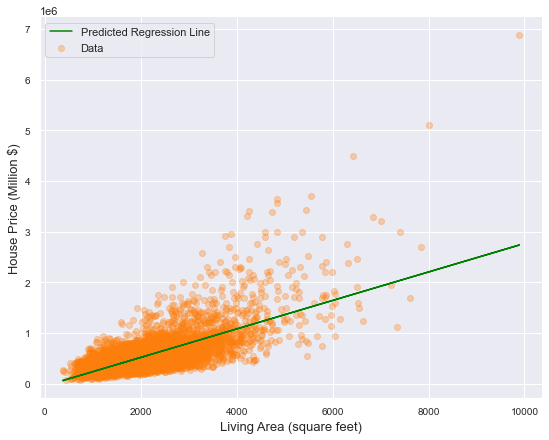

In [12]:
# Simple Linear Regression
# X : sqft_living 

X = np.array(data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y = np.array(data['price'], dtype=pd.Series)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

lr = LinearRegression()
lr.fit(X_train,y_train)

pred_train_LR = lr.predict(X_train)
pred_test_LR = lr.predict(X_test)


train_rmse_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))
train_mse_LR = mean_absolute_error(y_train, pred_train_LR)
train_r2_LR = r2_score(y_train, pred_train_LR)

test_rmse_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
test_mse_LR = mean_absolute_error(y_test, pred_test_LR)
test_r2_LR = r2_score(y_test, pred_test_LR)


results = pd.DataFrame(index=['Simple LR Train', 'Simple LR Test'], columns = ['rmse', 'mse', 'r2'])

results.loc['Simple LR Train', 'rmse'] = train_rmse_LR
results.loc['Simple LR Train', 'mse'] = train_mse_LR
results.loc['Simple LR Train', 'r2'] = train_r2_LR
results.loc['Simple LR Test', 'rmse'] = test_rmse_LR
results.loc['Simple LR Test', 'mse'] = test_mse_LR
results.loc['Simple LR Test', 'r2'] = test_r2_LR


sns.set(style="darkgrid", font_scale=1) # style = one of {darkgrid, whitegrid, dark, white, ticks}

plt.figure(figsize=(9,7))
plt.scatter(X_test,y_test,color='#ff7f0e',label="Data", alpha=.3)
plt.plot(X_test,lr.predict(X_test),color="green",label="Predicted Regression Line")
plt.xlabel("Living Area (square feet)", fontsize=13)
plt.ylabel("House Price (Million $)", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

results

### Multiple Regression #1

In [13]:
# Multiple Regression #1
# X : bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront
 
features = ['const','bedrooms','bathrooms','sqft_living','sqft_lot','floors']

X = np.array(data[features], dtype=pd.Series)
y = np.array(data['price'], dtype=pd.Series)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

lr = LinearRegression()
lr.fit(X_train,y_train)

pred_train_LR = lr.predict(X_train)
pred_test_LR = lr.predict(X_test)


train_rmse_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))
train_mse_LR = mean_absolute_error(y_train, pred_train_LR)
train_r2_LR = r2_score(y_train, pred_train_LR)

test_rmse_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
test_mse_LR = mean_absolute_error(y_test, pred_test_LR)
test_r2_LR = r2_score(y_test, pred_test_LR)


results = pd.DataFrame(index=['Mul LR1 Train', 'Mul LR1 Test'], columns = ['rmse', 'mse', 'r2'])


results.loc['Mul LR1 Train', 'rmse'] = train_rmse_LR
results.loc['Mul LR1 Train', 'mse'] = train_mse_LR
results.loc['Mul LR1 Train', 'r2'] = train_r2_LR
results.loc['Mul LR1 Test', 'rmse'] = test_rmse_LR
results.loc['Mul LR1 Test', 'mse'] = test_mse_LR
results.loc['Mul LR1 Test', 'r2'] = test_r2_LR

print(results)


                        rmse            mse        r2
Mul LR1 Train  258939.076207  171906.001369  0.505514
Mul LR1 Test   253603.154386  166461.693388  0.515889


### Multiple Regression #2

In [14]:
# Multiple Regression #2
# X : bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, grade
 
features = ['const','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade']

X = np.array(data[features], dtype=pd.Series)
y = np.array(data['price'], dtype=pd.Series)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

lr = LinearRegression()
lr.fit(X_train,y_train)

pred_train_LR = lr.predict(X_train)
pred_test_LR = lr.predict(X_test)


train_rmse_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))
train_mse_LR = mean_absolute_error(y_train, pred_train_LR)
train_r2_LR = r2_score(y_train, pred_train_LR)

test_rmse_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
test_mse_LR = mean_absolute_error(y_test, pred_test_LR)
test_r2_LR = r2_score(y_test, pred_test_LR)


results = pd.DataFrame(index=['Mul LR2 Train', 'Mul LR2 Test'], columns = ['rmse', 'mse', 'r2'])

results.loc['Mul LR2 Train', 'rmse'] = train_rmse_LR
results.loc['Mul LR2 Train', 'mse'] = train_mse_LR
results.loc['Mul LR2 Train', 'r2'] = train_r2_LR
results.loc['Mul LR2 Test', 'rmse'] = test_rmse_LR
results.loc['Mul LR2 Test', 'mse'] = test_mse_LR
results.loc['Mul LR2 Test', 'r2'] = test_r2_LR

print(results)

                        rmse            mse        r2
Mul LR2 Train  234730.621487  155930.831674  0.593652
Mul LR2 Test   230117.932926  151993.824583    0.6014


### Multiple Regression #3

In [15]:
# Multiple Regression #3
# X : bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, 
#     view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated,
#     lat, long, sqft_living15, sqft_lot15
 
features = ['const', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = np.array(data[features], dtype=pd.Series)
y = np.array(data['price'], dtype=pd.Series)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

lr = LinearRegression()
lr.fit(X_train,y_train)

pred_train_LR = lr.predict(X_train)
pred_test_LR = lr.predict(X_test)


train_rmse_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))
train_mse_LR = mean_absolute_error(y_train, pred_train_LR)
train_r2_LR = r2_score(y_train, pred_train_LR)

test_rmse_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
test_mse_LR = mean_absolute_error(y_test, pred_test_LR)
test_r2_LR = r2_score(y_test, pred_test_LR)

results = pd.DataFrame(index=['Mul LR2 Train', 'Mul LR2 Test'], columns = ['rmse', 'mse', 'r2'])


results = pd.DataFrame(index = ['Mul LR3 Train', 'Mul LR3 Test',
                                'Ridge1 Train', 'Ridge1 Test',
                                'Ridge2 Train', 'Ridge2 Test',
                                'Ridge3 Train', 'Ridge3 Test',
                                'Lasso1 Train', 'Lasso1 Test',
                                'Lasso2 Train', 'Lasso2 Test',
                                'Lasso3 Train', 'Lasso3 Test',
                                'Poly1 Train', 'Poly1 Test',
                                'Poly2 Train', 'Poly2 Test'], columns = ['rmse', 'mse', 'r2'])


results.loc['Mul LR3 Train', 'rmse'] = train_rmse_LR
results.loc['Mul LR3 Train', 'mse'] = train_mse_LR
results.loc['Mul LR3 Train', 'r2'] = train_r2_LR
results.loc['Mul LR3 Test', 'rmse'] = test_rmse_LR
results.loc['Mul LR3 Test', 'mse'] = test_mse_LR
results.loc['Mul LR3 Test', 'r2'] = test_r2_LR

results.dropna()

,rmse,mse,r2
Mul LR3 Train,203170.583052,126983.514152,0.695575
Mul LR3 Test,201516.823305,125285.945484,0.694326


## Regularization
### Ridge

In [16]:
# Ridge 

# X : bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, 
#     view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated,
#     lat, long, sqft_living15, sqft_lot15

# α : 1, 100, 1000
 
features = ['const', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']


X = np.array(data[features], dtype=pd.Series)
y = np.array(data['price'], dtype=pd.Series)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)


model_Ridge1 = Ridge(alpha = 1)
model_Ridge2 = Ridge(alpha = 100)
model_Ridge3 = Ridge(alpha = 1000)


model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)
model_Ridge3.fit(X_train, y_train)

pred_train_Rg1 = model_Ridge1.predict(X_train)
pred_train_Rg2 = model_Ridge2.predict(X_train)
pred_train_Rg3 = model_Ridge3.predict(X_train)
pred_test_Rg1 = model_Ridge1.predict(X_test)
pred_test_Rg2 = model_Ridge2.predict(X_test)
pred_test_Rg3 = model_Ridge3.predict(X_test)

train_rmse_Rg1 = np.sqrt(mean_squared_error(y_train, pred_train_Rg1))
train_mse_Rg1 = mean_absolute_error(y_train, pred_train_Rg1)
train_r2_Rg1 = r2_score(y_train, pred_train_Rg1)
test_rmse_Rg1 = np.sqrt(mean_squared_error(y_test, pred_test_Rg1))
test_mse_Rg1 = mean_absolute_error(y_test, pred_test_Rg1)
test_r2_Rg1 = r2_score(y_test, pred_test_Rg1)

train_rmse_Rg2 = np.sqrt(mean_squared_error(y_train, pred_train_Rg2))
train_mse_Rg2 = mean_absolute_error(y_train, pred_train_Rg2)
train_r2_Rg2 = r2_score(y_train, pred_train_Rg2)
test_rmse_Rg2 = np.sqrt(mean_squared_error(y_test, pred_test_Rg2))
test_mse_Rg2 = mean_absolute_error(y_test, pred_test_Rg2)
test_r2_Rg2 = r2_score(y_test, pred_test_Rg2)

train_rmse_Rg3 = np.sqrt(mean_squared_error(y_train, pred_train_Rg3))
train_mse_Rg3 = mean_absolute_error(y_train, pred_train_Rg3)
train_r2_Rg3 = r2_score(y_train, pred_train_Rg3)
test_rmse_Rg3 = np.sqrt(mean_squared_error(y_test, pred_test_Rg3))
test_mse_Rg3 = mean_absolute_error(y_test, pred_test_Rg3)
test_r2_Rg3 = r2_score(y_test, pred_test_Rg3)


In [17]:
results.loc['Ridge1 Train', 'rmse'] = train_rmse_Rg1
results.loc['Ridge1 Train', 'mse'] = train_mse_Rg1
results.loc['Ridge1 Train', 'r2'] = train_r2_Rg1
results.loc['Ridge1 Test', 'rmse'] = test_rmse_Rg1
results.loc['Ridge1 Test', 'mse'] = test_mse_Rg1
results.loc['Ridge1 Test', 'r2'] = test_r2_Rg1

results.loc['Ridge2 Train', 'rmse'] = train_rmse_Rg2
results.loc['Ridge2 Train', 'mse'] = train_mse_Rg2
results.loc['Ridge2 Train', 'r2'] = train_r2_Rg2
results.loc['Ridge2 Test', 'rmse'] = test_rmse_Rg2
results.loc['Ridge2 Test', 'mse'] = test_mse_Rg2
results.loc['Ridge2 Test', 'r2'] = test_r2_Rg2

results.loc['Ridge3 Train', 'rmse'] = train_rmse_Rg3
results.loc['Ridge3 Train', 'mse'] = train_mse_Rg3
results.loc['Ridge3 Train', 'r2'] = train_r2_Rg3
results.loc['Ridge3 Test', 'rmse'] = test_rmse_Rg3
results.loc['Ridge3 Test', 'mse'] = test_mse_Rg3
results.loc['Ridge3 Test', 'r2'] = test_r2_Rg3

results.dropna().sort_values('r2', ascending=False)

,rmse,mse,r2
Mul LR3 Train,203170.583052,126983.514152,0.695575
Ridge1 Train,203171.322738,126974.018523,0.695573
Mul LR3 Test,201516.823305,125285.945484,0.694326
Ridge1 Test,201535.083287,125275.408271,0.694271
Ridge2 Train,205484.437746,127819.495799,0.688601
Ridge2 Test,204749.477625,126204.511835,0.68444
Ridge3 Train,215576.269378,136309.53099,0.657263
Ridge3 Test,215694.469256,135014.670772,0.649802


### Lasso

In [18]:
# Lasso

# X : bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, 
#     view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated,
#     lat, long, sqft_living15, sqft_lot15

# α : 1, 100, 1000
 
features = ['const', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']


model_Lasso1 = Lasso(alpha = 1)
model_Lasso2 = Lasso(alpha = 100)
model_Lasso3 = Lasso(alpha = 1000)


model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)
model_Lasso3.fit(X_train, y_train)

pred_train_La1 = model_Lasso1.predict(X_train)
pred_train_La2 = model_Lasso2.predict(X_train)
pred_train_La3 = model_Lasso3.predict(X_train)
pred_test_La1 = model_Lasso1.predict(X_test)
pred_test_La2 = model_Lasso2.predict(X_test)
pred_test_La3 = model_Lasso3.predict(X_test)

train_rmse_La1 = np.sqrt(mean_squared_error(y_train, pred_train_La1))
train_mse_La1 = mean_absolute_error(y_train, pred_train_La1)
train_r2_La1 = r2_score(y_train, pred_train_La1)
test_rmse_La1 = np.sqrt(mean_squared_error(y_test, pred_test_La1))
test_mse_La1 = mean_absolute_error(y_test, pred_test_La1)
test_r2_La1 = r2_score(y_test, pred_test_La1)

train_rmse_La2 = np.sqrt(mean_squared_error(y_train, pred_train_La2))
train_mse_La2 = mean_absolute_error(y_train, pred_train_La2)
train_r2_La2 = r2_score(y_train, pred_train_La2)
test_rmse_La2 = np.sqrt(mean_squared_error(y_test, pred_test_La2))
test_mse_La2 = mean_absolute_error(y_test, pred_test_La2)
test_r2_La2 = r2_score(y_test, pred_test_La2)

train_rmse_La3 = np.sqrt(mean_squared_error(y_train, pred_train_La3))
train_mse_La3 = mean_absolute_error(y_train, pred_train_La3)
train_r2_La3 = r2_score(y_train, pred_train_La3)
test_rmse_La3 = np.sqrt(mean_squared_error(y_test, pred_test_La3))
test_mse_La3 = mean_absolute_error(y_test, pred_test_La3)
test_r2_La3 = r2_score(y_test, pred_test_La3)


In [19]:
results.loc['Lasso1 Train', 'rmse'] = train_rmse_La1
results.loc['Lasso1 Train', 'mse'] = train_mse_La1
results.loc['Lasso1 Train', 'r2'] = train_r2_La1
results.loc['Lasso1 Test', 'rmse'] = test_rmse_La1
results.loc['Lasso1 Test', 'mse'] = test_mse_La1
results.loc['Lasso1 Test', 'r2'] = test_r2_La1

results.loc['Lasso2 Train', 'rmse'] = train_rmse_La2
results.loc['Lasso2 Train', 'mse'] = train_mse_La2
results.loc['Lasso2 Train', 'r2'] = train_r2_La2
results.loc['Lasso2 Test', 'rmse'] = test_rmse_La2
results.loc['Lasso2 Test', 'mse'] = test_mse_La2
results.loc['Lasso2 Test', 'r2'] = test_r2_La2


results.loc['Lasso3 Train', 'rmse'] = train_rmse_La3
results.loc['Lasso3 Train', 'mse'] = train_mse_La3
results.loc['Lasso3 Train', 'r2'] = train_r2_La3
results.loc['Lasso3 Test', 'rmse'] = test_rmse_La3
results.loc['Lasso3 Test', 'mse'] = test_mse_La3
results.loc['Lasso3 Test', 'r2'] = test_r2_La3

results.dropna().sort_values('r2', ascending=False)

,rmse,mse,r2
Mul LR3 Train,203170.583052,126983.514152,0.695575
Lasso1 Train,203170.583735,126982.919514,0.695575
Ridge1 Train,203171.322738,126974.018523,0.695573
Lasso2 Train,203177.412551,126927.82337,0.695554
Mul LR3 Test,201516.823305,125285.945484,0.694326
Lasso1 Test,201517.268888,125285.311236,0.694325
Ridge1 Test,201535.083287,125275.408271,0.694271
Lasso2 Test,201568.522874,125224.793727,0.694169
Lasso3 Train,203852.400371,126793.497508,0.693528
Lasso3 Test,202680.33217,125139.2077,0.690786


### Polynomial Regression

In [20]:
# Polynomial

# X : bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, 
#     view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated,
#     lat, long, sqft_living15, sqft_lot15

# degree : 2, 3


poly_features1 = PolynomialFeatures(degree=2)
poly_features2 = PolynomialFeatures(degree=3)

poly1_train = poly_features1.fit_transform(X_train)
poly1_test = poly_features1.fit_transform(X_test)
poly2_train = poly_features2.fit_transform(X_train)
poly2_test = poly_features2.fit_transform(X_test)


model_poly1 = LinearRegression().fit(poly1_train, y_train)
model_poly2 = LinearRegression().fit(poly2_train, y_train)

pred_train_poly1 = model_poly1.predict(poly1_train)
pred_train_poly2 = model_poly2.predict(poly2_train)
pred_test_poly1 = model_poly1.predict(poly1_test)
pred_test_poly2 = model_poly2.predict(poly2_test)

train_rmse_poly1 = np.sqrt(mean_squared_error(y_train, pred_train_poly1))
train_mse_poly1 = mean_absolute_error(y_train, pred_train_poly1)
train_r2_poly1 = r2_score(y_train, pred_train_poly1)
test_rmse_poly1 = np.sqrt(mean_squared_error(y_test, pred_test_poly1))
test_mse_poly1 = mean_absolute_error(y_test, pred_test_poly1)
test_r2_poly1 = r2_score(y_test, pred_test_poly1)

train_rmse_poly2 = np.sqrt(mean_squared_error(y_train, pred_train_poly2))
train_mse_poly2 = mean_absolute_error(y_train, pred_train_poly2)
train_r2_poly2 = r2_score(y_train, pred_train_poly2)
test_rmse_poly2 = np.sqrt(mean_squared_error(y_test, pred_test_poly2))
test_mse_poly2 = mean_absolute_error(y_test, pred_test_poly2)
test_r2_poly2 = r2_score(y_test, pred_test_poly2)

results.loc['Poly1 Train', 'rmse'] = train_rmse_poly1
results.loc['Poly1 Train', 'mse'] = train_mse_poly1
results.loc['Poly1 Train', 'r2'] = train_r2_poly1
results.loc['Poly1 Test', 'rmse'] = test_rmse_poly1
results.loc['Poly1 Test', 'mse'] = test_mse_poly1
results.loc['Poly1 Test', 'r2'] = test_r2_poly1

results.loc['Poly2 Train', 'rmse'] = train_rmse_poly2
results.loc['Poly2 Train', 'mse'] = train_mse_poly2
results.loc['Poly2 Train', 'r2'] = train_r2_poly2
results.loc['Poly2 Test', 'rmse'] = test_rmse_poly2
results.loc['Poly2 Test', 'mse'] = test_mse_poly2
results.loc['Poly2 Test', 'r2'] = test_r2_poly2


#results.dropna().sort_values('r2', ascending=False)

### Conclusion

In [21]:
results.dropna().sort_values('r2', ascending=False)

,rmse,mse,r2
Poly1 Train,157142.679235,101732.217037,0.817884
Poly1 Test,163206.957773,102341.960869,0.799501
Poly2 Train,176454.508603,113455.241731,0.770372
Mul LR3 Train,203170.583052,126983.514152,0.695575
Lasso1 Train,203170.583735,126982.919514,0.695575
Ridge1 Train,203171.322738,126974.018523,0.695573
Lasso2 Train,203177.412551,126927.82337,0.695554
Mul LR3 Test,201516.823305,125285.945484,0.694326
Lasso1 Test,201517.268888,125285.311236,0.694325
Ridge1 Test,201535.083287,125275.408271,0.694271


In [78]:
a = results.columns
b = results.index
print(a,b)

Index(['rmse', 'mse', 'r2'], dtype='object') Index(['Mul LR3 Train', 'Mul LR3 Test', 'Ridge1 Train', 'Ridge1 Test',
       'Ridge2 Train', 'Ridge2 Test', 'Ridge3 Train', 'Ridge3 Test',
       'Lasso1 Train', 'Lasso1 Test', 'Lasso2 Train', 'Lasso2 Test',
       'Lasso3 Train', 'Lasso3 Test', 'Poly1 Train', 'Poly1 Test',
       'Poly2 Train', 'Poly2 Test'],
      dtype='object')


TypeError: only size-1 arrays can be converted to Python scalars

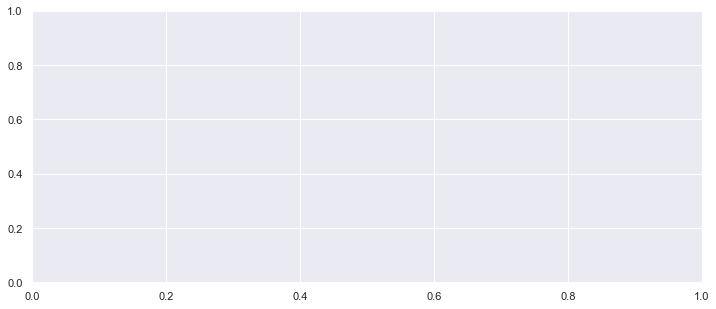

In [74]:
plt.figure(figsize = (12,5))
plt.bar(10,results)

ax = fix.add_axes([0,0,1,1])
ax.bar(b, a)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

ValueError: x and y must be the same size

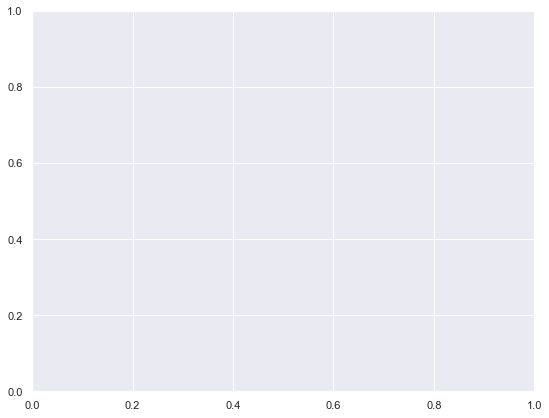

In [22]:
plt.figure(figsize = (12,5))
plt.title('R-squared')
plt.bar(range(num_print), importance[:num_print],
       align = 'center')
plt.xticks(range(num_print), columns[:num_print], rotation = 90, fontsize = 11)
plt.show()